# Pytorch

- Pytorch는 TensorFlow와 함께 Deep Learning에서 가장 널리 사용되는 framework
- 초기에는 Torch라는 이름으로 Lua 언어 기반으로 만들어졌으나, 이후 python 기반으로 변경한 것이 Pytorch
- New York 대학교와 Facebook이 공동으로 만들었고, Deep Learning 연구자들 사이에서는 가장 대중적으로 널리 사용되는 framework
- Deep Learning 연구하는 사람들은 TensorFlow보다 Pytorch 더 많이 사용

## 1. Pytorch Basic

In [2]:
import torch

print(torch.__version__)

1.11.0


In [3]:
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt
import numpy as np

MNIST Data 다운받기
- 공개 dataset에서 train 데이터, test 데이터 내려받기

In [4]:
training_data = datasets.MNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor(),
)

test_data = datasets.MNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor(),
)

### DataLoader
- TensorFlow에서 tf.Data.Dataset과 같은 역할

In [5]:
batch_size = 64

# dataset 생성
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print('Shape of x [N, C, H, W]: ', X.shape)
    print('Shape of y: ', y.shape, y.dtype)
    break

Shape of x [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


학습에 사용할 CPU나 GPU 장치 얻기
- GPU가 있으면 GPU 쓰도록 코딩

In [6]:
device = "cuda" if torch.cuda.is_available() else 'cpu'
print('using {} device'.format(device))

using cpu device


### 모델 정의
- class로 모델 만들도록 권장 함
- to(devide) : 생성된 모델을 GPU로 옮기기

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,10)
        )
    
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


### Loss 함수와 Optimizer 설정

In [8]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

### Training을 위한 함수

- TensorFlow와 차이점
  - TensorFlow는 이중 loop 였는데, Pytorch는 dataloader를 받아와서, 안에서 for문 생성

In [9]:
def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    for batch, (X,y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        
        # 예측 오류 계산
        pred = model(X)
        loss = loss_fn(pred, y)
        
        # backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

### Test를 위한 함수

In [10]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0
    
    # no_grad() : gradient 전파 안 되게 함
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
            
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}')

In [11]:
epochs = 10
for t in range(epochs):
    print(f'Epoch {t+1}\n------------------------------------')
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
------------------------------------
loss: 2.286137 [    0/60000]
loss: 0.497393 [ 6400/60000]
loss: 0.346694 [12800/60000]
loss: 0.357643 [19200/60000]
loss: 0.251323 [25600/60000]
loss: 0.340979 [32000/60000]
loss: 0.157604 [38400/60000]
loss: 0.363198 [44800/60000]
loss: 0.260771 [51200/60000]
loss: 0.331137 [57600/60000]
Test Error: 
 Accuracy: 94.3%, Avg loss: 0.191733
Epoch 2
------------------------------------
loss: 0.124024 [    0/60000]
loss: 0.185612 [ 6400/60000]
loss: 0.110246 [12800/60000]
loss: 0.177035 [19200/60000]
loss: 0.197120 [25600/60000]
loss: 0.244412 [32000/60000]
loss: 0.058470 [38400/60000]
loss: 0.235918 [44800/60000]
loss: 0.157711 [51200/60000]
loss: 0.198995 [57600/60000]
Test Error: 
 Accuracy: 95.6%, Avg loss: 0.138271
Epoch 3
------------------------------------
loss: 0.079269 [    0/60000]
loss: 0.118605 [ 6400/60000]
loss: 0.078662 [12800/60000]
loss: 0.085851 [19200/60000]
loss: 0.122364 [25600/60000]
loss: 0.170875 [32000/60000]
loss: 0.038

### 내가 쓴 손글씨로 Test 해보기

Colab을 쓰는 경우 아래 cell 실행하면 파일 업로드 가능
- 그림판과 같은 도구를 이용하여 손으로 숫자 쓰고 파일로 저장하고 업로드 하기
- 파일명 : image.png

```python
imoprt os
from PIL import Image
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
```

In [ ]:
# image file 경로 설정
cur_dir = os.getcwd()
img_path = os.path.join(cur_dir, 'image.png')

# image file 읽기
cur_img = Image.open(img_path)

# 28×28로 resize
cur_img = cur_img.resize((28,28))
image = np.asarray(cur_img)

# color image일 경우 RGB 평균값으로 gray scale로 변경
try:
    image = np.mean(image, axis=2)
except:
    pass

# upload한 image는 흰 배경에 검은 글씨로 되어 있으므로, MNIST data와 같이 검은 배경에 흰 글씨로 변경
image = np.abs(255-image)

# MNIST와 동일하게 data preprocessing(255로 나눠줌)
image = image.astype(np.float32)/255.

# 화면에 출력하여 확인
plt.imshow(image, cmap='gray')
plt.show()

- 'image'가 현재 numpy array 형태인데, torch에서 사용하는 tensor로 변경
- reshape
- model에 넣고 결과 출력

In [ ]:
image = torch.as_tensor(image).to(device).reshape(1,1,28,28)
model.eval()
predict = model(image)
print("Model이 예측한 값은 {} 입니다.".format(predict.argmax(1).item()))

## 2. Tensor

- Tensor는 배열(array)이나 행렬(matrix)과 매우 유사한 특수한 자료구조
  - 특히 numpy ndarray와 거의 똑같음 (TensorFlow가 numpy ndarray와 비슷한 것보다 훨씬 똑같음)
- Pytorch에서는 tensor를 사용하여 모델의 입력(input)과 출력(output), 모델의 매개변수들을 부호화(encode)

### 2.1 list로부터 직접 tensor 생성하기

In [12]:
data = [[1,2],[3,4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


### 2.2 numpy array로부터 tensor 생성하기

In [13]:
np_array = np.array(data)

In [14]:
# 방법1
x_np_1 = torch.tensor(np_array)
print(x_np_1)

# 방법2
x_np_2 = torch.as_tensor(np_array)
print(x_np_2)

# 방법3
x_np_3 = torch.from_numpy(np_array)
print(x_np_3)

tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)
tensor([[1, 2],
        [3, 4]], dtype=torch.int32)


<b>차이점</b>
- 방법1 : copy 해서 새로운 tensor 만듦
  - 새로 만든 x_np_1 값 바꿔도 원래 np_array 값은 안 바뀜
  - 메모리 낭비될 수 있음
- 방법2, 방법3 : view를 만듦
  - 새로 만든 x_np_2, x_np_3 값 바꾸면 원래 np_array 값도 바뀜

In [15]:
x_np_1[0,0] = 5
print(x_np_1)
print(np_array)

tensor([[5, 2],
        [3, 4]], dtype=torch.int32)
[[1 2]
 [3 4]]


In [16]:
x_np_2[0,0] = 6
print(x_np_2)
print(np_array)

tensor([[6, 2],
        [3, 4]], dtype=torch.int32)
[[6 2]
 [3 4]]


In [17]:
x_np_3[0,0] = 7
print(x_np_3)
print(np_array)

tensor([[7, 2],
        [3, 4]], dtype=torch.int32)
[[7 2]
 [3 4]]


<b>다시 numpy로 바꾸기</b>

In [18]:
np_again = x_np_1.numpy()
print(np_again, type(np_again))

[[5 2]
 [3 4]] <class 'numpy.ndarray'>


### 2.3 numpy와 동일하게 아래 기능들 모두 사용 가능

In [19]:
a = torch.ones(2,3)
b = torch.zeros(2,3)
c = torch.full((2,3),2)
d = torch.empty(2,3)
print(a)
print(b)
print(c)
print(d)

tensor([[1., 1., 1.],
        [1., 1., 1.]])
tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([[2, 2, 2],
        [2, 2, 2]])
tensor([[0.0000e+00, 0.0000e+00, 1.8754e+28],
        [1.6634e-04, 6.6280e-10, 1.3040e-11]])


In [20]:
e = torch.zeros_like(c)
f = torch.ones_like(c)
g = torch.full_like(c, 3)
h = torch.empty_like(c)
print(e)
print(f)
print(g)
print(h)

tensor([[0, 0, 0],
        [0, 0, 0]])
tensor([[1, 1, 1],
        [1, 1, 1]])
tensor([[3, 3, 3],
        [3, 3, 3]])
tensor([[0, 0, 0],
        [0, 0, 0]])


In [21]:
i = torch.eye(3)
print(i)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


In [22]:
j = torch.arange(10)
print(j)

tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])


In [23]:
k = torch.rand(2,2)
l = torch.randn(2,2)
print(k)
print(l)

tensor([[0.8637, 0.1836],
        [0.0368, 0.6927]])
tensor([[ 2.2270, -0.0899],
        [-0.3708,  1.4289]])


### 2.4 Tensor의 속성

- tensor.device : 지금 이 tensor가 올라가 있는 메모리 확인 (CPU/GPU)

In [24]:
tensor = torch.rand(3,4)

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


<b>속성 변경</b>
- reshape이 numpy, TensorFlow에서도 모두 사용되는 문법이니 보통 view보다는 reshape 씀
- reshape과 view의 차이점
  - reshape : original과 분리되는 copy를 만들기도 하고 original 값까지 바꾸는 view를 만들기도 함 (랜덤)
  - view : 현재 생성한 것의 특정 값 바꾸면 original 값까지 바뀜

In [25]:
tensor = tensor.reshape(4,3)
#tensor = tensor.view(4,3)

# type 변경
tensor = tensor.int()

# device 변경
# cuda : GPU로 변경
if torch.cuda.is_available():
    tensor = tensor.to('cuda')

print(f'Shape of tensor: {tensor.shape}')
print(f'Datatype of tensor: {tensor.dtype}')
print(f'Device tensor is stored on: {tensor.device}')

Shape of tensor: torch.Size([4, 3])
Datatype of tensor: torch.int32
Device tensor is stored on: cpu


### 2.5 Indexing과 Slicing

In [26]:
a = torch.arange(1,13).reshape(3,4)
print(a)

tensor([[ 1,  2,  3,  4],
        [ 5,  6,  7,  8],
        [ 9, 10, 11, 12]])


indexing

In [27]:
print(a[1])
print(a[0,-1])

tensor([5, 6, 7, 8])
tensor(4)


slicing

In [28]:
print(a[1:-1])
print(a[:2,2:])

tensor([[5, 6, 7, 8]])
tensor([[3, 4],
        [7, 8]])


### 2.6 Transpose

numpy, TensorFlow, Pytorch 세 개가 모두 다른 부분

In [29]:
a = torch.arange(16).reshape(2,2,4)
print(a, a.shape)

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7]],

        [[ 8,  9, 10, 11],
         [12, 13, 14, 15]]]) torch.Size([2, 2, 4])


transpose : numpy의 swap과 같음

In [30]:
b = a.transpose(1,2)
print(b, b.shape)

tensor([[[ 0,  4],
         [ 1,  5],
         [ 2,  6],
         [ 3,  7]],

        [[ 8, 12],
         [ 9, 13],
         [10, 14],
         [11, 15]]]) torch.Size([2, 4, 2])


permute : tensorflow의 transpose와 같음

In [31]:
c = a.permute((2,0,1))
print(c, c.shape)

tensor([[[ 0,  4],
         [ 8, 12]],

        [[ 1,  5],
         [ 9, 13]],

        [[ 2,  6],
         [10, 14]],

        [[ 3,  7],
         [11, 15]]]) torch.Size([4, 2, 2])


### 2.7 Tensor 연산

numpy, TensorFlow, Pytorch 간 차이 없음

In [32]:
x = torch.tensor([[1,2],[3,4]], dtype=torch.float32)
y = torch.tensor([[5,6],[7,8]], dtype=torch.float32)
print(x)
print(y)

tensor([[1., 2.],
        [3., 4.]])
tensor([[5., 6.],
        [7., 8.]])


In [33]:
print(x + y)
print(x - y)
print(x * y)
print(x / y)
print(x @ y)
print("="*30)
print(torch.add(x,y))
print(torch.subtract(x,y))
print(torch.multiply(x,y))
print(torch.divide(x,y))
print(torch.matmul(x,y))

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[-4., -4.],
        [-4., -4.]])
tensor([[ 5., 12.],
        [21., 32.]])
tensor([[0.2000, 0.3333],
        [0.4286, 0.5000]])
tensor([[19., 22.],
        [43., 50.]])


<b>pytorch에는 in-place 연산이라는 것 있음</b>
- torch.add(x,y)가 아닌 x.add(y)라고 쓸 수 있음
- 이때, x 값은 변하지 않음
- 그런데 x.add_(y)라고 하면 inplace 되어서 x 값도 덧셈 결과로 변경됨
- x. 입력하고 tab 해보면 여러 가지 연산 볼 수 있는데, 그 중 add_ 처럼 'underbar(\_)' 붙은 건 inplace 연산

In [34]:
print(x.add(y))
print(x)
print(x.add_(y))
print(x)

tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[1., 2.],
        [3., 4.]])
tensor([[ 6.,  8.],
        [10., 12.]])
tensor([[ 6.,  8.],
        [10., 12.]])


In [35]:
z = torch.arange(1,11).reshape(2,5)
print(z)

tensor([[ 1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10]])


axis = ?
- 해당하는 축이 사라지는 방향으로 연산 (sum)

In [36]:
sum1 = torch.sum(z, axis=0)
sum2 = torch.sum(z, axis=1)
sum3 = torch.sum(z, axis=-1)
print(sum1, sum1.shape)
print(sum2, sum2.shape)
print(sum3, sum3.shape)

tensor([ 7,  9, 11, 13, 15]) torch.Size([5])
tensor([15, 40]) torch.Size([2])
tensor([15, 40]) torch.Size([2])


<b>concat & stack</b>
- stack : 새로운 축을 생성

In [37]:
a = torch.arange(24).reshape(4,6)
b = a.clone().detach()
print(a, a.shape)
print(b, b.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])
tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([4, 6])


In [38]:
c = torch.cat([a,b], axis=0)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23],
        [ 0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23]]) torch.Size([8, 6])


In [39]:
c = torch.cat([a,b], axis=-1)
print(c, c.shape)

tensor([[ 0,  1,  2,  3,  4,  5,  0,  1,  2,  3,  4,  5],
        [ 6,  7,  8,  9, 10, 11,  6,  7,  8,  9, 10, 11],
        [12, 13, 14, 15, 16, 17, 12, 13, 14, 15, 16, 17],
        [18, 19, 20, 21, 22, 23, 18, 19, 20, 21, 22, 23]]) torch.Size([4, 12])


stack : axis=0 → 0번 자리에 축 추가

In [40]:
d = torch.stack([a,b], axis=0)
print(d, d.shape)

tensor([[[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]],

        [[ 0,  1,  2,  3,  4,  5],
         [ 6,  7,  8,  9, 10, 11],
         [12, 13, 14, 15, 16, 17],
         [18, 19, 20, 21, 22, 23]]]) torch.Size([2, 4, 6])


stack : axis=-1 → -1번 자리에 축 추가

In [41]:
d = torch.stack([a,b], axis=-1)
print(d, d.shape)

tensor([[[ 0,  0],
         [ 1,  1],
         [ 2,  2],
         [ 3,  3],
         [ 4,  4],
         [ 5,  5]],

        [[ 6,  6],
         [ 7,  7],
         [ 8,  8],
         [ 9,  9],
         [10, 10],
         [11, 11]],

        [[12, 12],
         [13, 13],
         [14, 14],
         [15, 15],
         [16, 16],
         [17, 17]],

        [[18, 18],
         [19, 19],
         [20, 20],
         [21, 21],
         [22, 22],
         [23, 23]]]) torch.Size([4, 6, 2])


---
# Dataset / Dataloader

- Data를 처리하여 model에 공급하는 방법으로 Pytorch에서는 Dataset과 DataLoader 제공
- Dataset : data & label 저장
- DataLoader : Dataset을 model에 공급할 수 있도록 iterable 객체로 감싸줌

## 1. FashionMNIST data 불러오기

In [42]:
import numpy as np

from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as tr

In [43]:
training_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
    transform=ToTensor()  # tensor로 바꿈 & FashionMNIST를 255로 나눠서 0~1 사이 값으로 scaling
)

test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
    transform=ToTensor()
)

## 2. 데이터 시각화

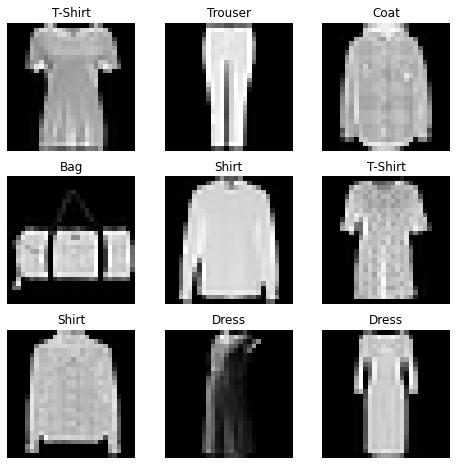

In [44]:
labels_map = {
    0: 'T-Shirt',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle Boot'
}
figure = plt.figure(figsize=(8,8))
cols, rows = 3,3

# 랜덤하게 9개를 골라서 해당 index에 해당하는 training_data 출력
for i in range(1, cols*rows+1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis('off')
    plt.imshow(img.squeeze(), cmap='gray')
plt.show()

## 3. DataLoader 만들기

In [45]:
train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=False)

DataLoader를 통해 반복하기 (iterate)</br>
이미지와 정답(label) 표시
- .size()와 .shape은 동일한 의미 (어떤 걸 써도 상관 없음)
- squeeze()
  - 지금 data shape이 앞에 channel이 들어가 있음
  - TensorFlow에서는 (28,28)으로 되어 있었는데, 여기서는 (1,28,28)
  - 그런데 grayscale 이미지 볼 때는 channel이 없어야 됨
  - 이걸 없애 주는 역할이 squeeze()

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


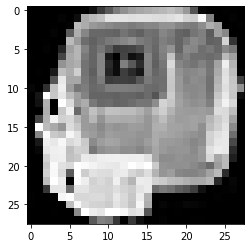

Label: 8


In [46]:
train_features, train_labels = next(iter(train_dataloader))
print(f'Feature batch shape: {train_features.size()}')
print(f'Labels batch shape: {train_labels.size()}')

img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap='gray')
plt.show()
print(f'Label: {label}')

## 4. Custom Dataset, Data Loader 만들기

### 간단한 Custom Dataset/Transform/DataLoader 만들기

In [47]:
class CustomDataset(Dataset):
    # np_data : numpy data라고 가정
    # transform : 전처리할 때 필요한 transform
    def __init__(self, np_data, transform=None):
        self.data = np_data
        self.transform = transform
        self.len = np_data.shape[0]  # data 개수
    
    def __len__(self):
        return self.len
    
    # index에 해당하는 data를 return
    # 만약 transform이 있으면, transform 적용해서 return
    def __getitem__(self, idx):
        sample = self.data[idx]
        if self.transform:
            sample = self.transform(sample)
        return sample

<b>전처리로 사용할 함수</b>
- TensorFlow에서 tf.square와 같은 역할

In [48]:
def square(sample):
    return sample**2

transform 자리에 입력할 때
- 그냥 넣으면 안 되고 tr.Comopose()로 변환해 줘야 함
- 여러 개를 넣을 수도 있음
  - tr.Compose([square, xxx])

In [49]:
trans = tr.Compose([square])

data에는 0~9 숫자를 입력해라

In [50]:
np_data = np.arange(10)

각각을 모두 제곱해라

In [51]:
custom_dataset = CustomDataset(np_data, transform=trans)

In [52]:
custom_dataloader = DataLoader(custom_dataset, batch_size=2, shuffle=True)

In [53]:
for _ in range(3):
    for data in custom_dataloader:
        print(data)
    print("="*30)

tensor([49, 64], dtype=torch.int32)
tensor([36,  0], dtype=torch.int32)
tensor([9, 1], dtype=torch.int32)
tensor([16,  4], dtype=torch.int32)
tensor([81, 25], dtype=torch.int32)
tensor([25,  1], dtype=torch.int32)
tensor([0, 9], dtype=torch.int32)
tensor([36, 16], dtype=torch.int32)
tensor([81, 49], dtype=torch.int32)
tensor([ 4, 64], dtype=torch.int32)
tensor([25, 16], dtype=torch.int32)
tensor([36,  4], dtype=torch.int32)
tensor([49, 81], dtype=torch.int32)
tensor([64,  0], dtype=torch.int32)
tensor([1, 9], dtype=torch.int32)


---
# Model

### device 설정

- CPU/GPU 중 결정
- 'cuda' 사용이 가능하면 GPU

In [54]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


## 1. Model Class 만들기

- TensorFlow는 Model 만들기에 세 가지 방법을 사용하지만, Pytorch는 공식적으로 이렇게 class를 활용한 모델 만들기를 권장

In [55]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()  # 28×28을 vector로 펴기
        # 하나씩 지정해도 되지만
        # nn.Sequential을 사용하면, 한 번에 묶어서 쓰면 되서 편함
        self.linear_relu_stack = nn.Sequential(
            # Pytorch - nn.Linear : TensorFlow의 Dense Layer와 같은 역할
            # Dense Layer와 달리 nn.Linear에서는 28*28 input을 명시함
            nn.Linear(28*28, 128),
            nn.ReLU(),
            nn.Dropout(0.2),
            nn.Linear(128,10)
            # TensorFlow에서는 마지막에 softmax 쓰지만, 여기서는 안 씀
            # 나중에 Loss 계산할 때, softmax 쓸 거기 때문에 여기서는 빠져있음
        )
    
    # TensorFlow의 call method와 같은 기능
    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits    

Model instance 생성, device 설정

In [56]:
model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


가상의 data 만들어서 예측해보기

In [57]:
X = torch.rand(1,28,28,device=device)
logits = model(X)
pred_prob = nn.Softmax(dim=1)(logits)
y_pred = pred_prob.argmax(1)
print(f'Predicted class: {y_pred}')

Predicted class: tensor([7])


## 2. Training / Validation

### 2.1 Loss Function
- 손실 함수 초기화

In [58]:
loss_fn = nn.CrossEntropyLoss()

### 2.2 Optimizer

- optimizer : weight, bias update
- model.parameters() : 모델의 parameter들을 미분하고 update 해라

In [59]:
learning_rate = 1e-3
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

### 2.3 Training / Validation(Test) Function

Training을 위한 함수

In [63]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # 전체 data 개수 (6만개)
    # 6만 개 데이터를 batch 단위(64)로 나눠 학습
    # 이게 한 번 돌면 한 epoch이 끝난 것
    for batch, (X, y) in enumerate(dataloader):
        # X : 이미지, y : label
        # device에서 GPU로 보냄
        X, y = X.to(device), y.to(device)
        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred,y)
        
        # 역전파
        # zero_grad() : gradient가 남아있는 것 clean 해줌
        optimizer.zero_grad()
        loss.backward()   # gradient 생성 (backpropagation)
        optimizer.step()  # optimizer에서 weight, bias update
        
        # batch가 100번 돌 때마다 화면에 출력
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

Test를 위한 함수

In [66]:
def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    
    # 한 epoch에서 batch가 몇 번 들어가야 끝나는지 계산
    num_batches = len(dataloader)
    
    test_loss, correct = 0, 0
    
    # with torch.no_grad():
    # Gradient를 계산하지 않을 거라는 걸 알려주는 것
    # 안 써도 되지만 memory 절약을 위해 쓰는 걸 권장
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            # item() : torch tensor 중 0차원인 것(scalar 값인 것)은
            # item()을 쓰면 바로 해당 숫자를 뽑아 줌
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n')

학습 진행하기

In [67]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n ------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print('Done!')

Epoch 1
 ------------------------------
loss: 0.493957 [    0/60000]
loss: 0.332706 [ 6400/60000]
loss: 0.607512 [12800/60000]
loss: 0.326489 [19200/60000]
loss: 0.414436 [25600/60000]
loss: 0.381990 [32000/60000]
loss: 0.428773 [38400/60000]
loss: 0.425388 [44800/60000]
loss: 0.415842 [51200/60000]
loss: 0.308633 [57600/60000]
Test Error: 
 Accuracy: 85.2%, Avg loss: 0.426593 

Epoch 2
 ------------------------------
loss: 0.649881 [    0/60000]
loss: 0.359434 [ 6400/60000]
loss: 0.287935 [12800/60000]
loss: 0.513347 [19200/60000]
loss: 0.359240 [25600/60000]
loss: 0.364250 [32000/60000]
loss: 0.562118 [38400/60000]
loss: 0.369292 [44800/60000]
loss: 0.298844 [51200/60000]
loss: 0.578522 [57600/60000]
Test Error: 
 Accuracy: 85.5%, Avg loss: 0.404454 

Epoch 3
 ------------------------------
loss: 0.327099 [    0/60000]
loss: 0.365280 [ 6400/60000]
loss: 0.278361 [12800/60000]
loss: 0.454039 [19200/60000]
loss: 0.446914 [25600/60000]
loss: 0.303327 [32000/60000]
loss: 0.299344 [38400/

## 3. Model save & restore

- pytorch에서는 '.pth' 확장자 사용

### 3.1 parameter만 저장하고 불러오기

학습된 model parameter 저장
- state_dict() 라는 format으로 모델의 weight, bias 저장

In [68]:
torch.save(model.state_dict(), 'model_weights.pth')

새 Model instance 생성, device 설정 (GPU)

In [69]:
model2 = NeuralNetwork().to(device)
print(model2)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)


<b>test</b>
- eval() : training을 하는 게 아니라는 것을 모델에게 알려주는 것
  - inference 할 때는 eval() 해주는 게 좋음
- 학습이 하나도 안 된 상태니 정확도가 8.9%

In [73]:
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.2%, Avg loss: 0.333184 



저장한 parameter 불러오기 (weight, bias)

In [71]:
model2.load_state_dict(torch.load('model_weights.pth'))

<All keys matched successfully>

<b>test</b>
- 저장했던 weight, bias 적용
- 정확도가 88.2%로 다시 올라감

In [72]:
model2.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.2%, Avg loss: 0.333184 



### 3.2 Model 전체를 저장하고 불러오기

저장하기

In [74]:
torch.save(model, 'model.pth')

불러오기

In [75]:
model3 = torch.load('model.pth')

test

In [76]:
model3.eval()
test_loop(test_dataloader, model2, loss_fn)

Test Error: 
 Accuracy: 88.2%, Avg loss: 0.333184 



---
# Tensorboard 사용하여 시각화하기

### 1. Load the TensorBoard notebook extension

In [77]:
%load_ext tensorboard

In [78]:
from torch.utils.tensorboard import SummaryWriter

writer = SummaryWriter('./logs/pytorch')

### 2. 새 Model instance 생성, device 설정
- 하나도 학습되지 않은 상태 → 정확도 : 11.7%

In [79]:
model4 = NeuralNetwork().to(device)
print(model4)

model4.eval()
test_loop(test_dataloader, model4, loss_fn)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): ReLU()
    (2): Dropout(p=0.2, inplace=False)
    (3): Linear(in_features=128, out_features=10, bias=True)
  )
)
Test Error: 
 Accuracy: 11.7%, Avg loss: 2.305897 



### 3. Model의 구조를 tensorboard에 저장

- 모델의 구조 저장하려면 입력이 한 개 필요
- 랜덤하게 입력 X 만들기
- writer에 add_graph()로 model과 입력 X 넣기
- 모델이 tensorboard에 write 됨

In [80]:
X = torch.rand(1,28,28,device=device)
writer.add_graph(model4,X)

### 4. 기타 필요한 것들 tensorboard에 저장

- loss, accuracy 저장
- weight, bias 의 histogram 저장

In [85]:
def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)  # 전체 data 개수 (6만개)
    model.train()
    total_loss = 0.
   
    
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # 예측(prediction)과 손실(loss) 계산
        pred = model(X)
        loss = loss_fn(pred,y)
        
        # 역전파
        optimizer.zero_grad()
        loss.backward()   # gradient 생성 (backpropagation)
        optimizer.step()  # optimizer에서 weight, bias update
        
        # batch 단위 loss 계산
        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f'loss: {loss:>7f} [{current:>5d}/{size:>5d}]')

        # 전체 데이터의 loss 계산
        # len(dataloader) : batch 가 몇 개 들어갔는지
        total_loss += loss / len(dataloader)

    return total_loss            

In [88]:
def test(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0,0
    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    test_loss /= num_batches
    correct /= size
    print(f'Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: (test_loss:>8f) \n')
    return test_loss

### 5. 학습이 되는 동안 writer가 TensorBoard에 write

In [89]:
parameters = ['Weight1', 'Bias1', 'Weight2', 'Bias2']

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n ------------------------------")
    # train_loss 저장
    train_loss = train_loop(train_dataloader, model, loss_fn, optimizer)
    writer.add_scalar('training loss', train_loss, t)
    # model.parameters() : parameter들이 하나씩 꺼내져 나옴
    # add_histogram(name, param, t) : 이 이름(name)으로 parameter를 저장해라 (t : 몇 번째 epoch인지)
    for param, name in zip(model.parameters(), parameters):
        writer.add_histogram(name, param, t)
    # test_loss 저장
    test_loss = test(test_dataloader, model, loss_fn)
    writer.add_scalar('test loss', test_loss, t)
print('Done!')

Epoch 1
 ------------------------------
loss: 0.207744 [    0/60000]
loss: 0.386491 [ 6400/60000]
loss: 0.426200 [12800/60000]
loss: 0.217056 [19200/60000]
loss: 0.132200 [25600/60000]
loss: 0.329132 [32000/60000]
loss: 0.328750 [38400/60000]
loss: 0.416143 [44800/60000]
loss: 0.360943 [51200/60000]
loss: 0.158486 [57600/60000]
Test Error: 
 Accuracy: 88.7%, Avg loss: (test_loss:>8f) 

Epoch 2
 ------------------------------
loss: 0.277458 [    0/60000]
loss: 0.282787 [ 6400/60000]
loss: 0.117578 [12800/60000]
loss: 0.239410 [19200/60000]
loss: 0.142754 [25600/60000]
loss: 0.341028 [32000/60000]
loss: 0.180452 [38400/60000]
loss: 0.331701 [44800/60000]
loss: 0.205145 [51200/60000]
loss: 0.407487 [57600/60000]
Test Error: 
 Accuracy: 88.6%, Avg loss: (test_loss:>8f) 

Epoch 3
 ------------------------------
loss: 0.265841 [    0/60000]
loss: 0.236849 [ 6400/60000]
loss: 0.200243 [12800/60000]
loss: 0.436144 [19200/60000]
loss: 0.127317 [25600/60000]
loss: 0.228373 [32000/60000]
loss: 0.

### 6. write 기록 후에는 반드시 write를 close 해줘야 함

In [90]:
writer.close()

### 7. 저장된 directory 지정해서 TensorBoard 열어보기

In [91]:
%tensorboard --logdir './logs/pytorch'